## Assignment 3 Part 2

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Gridworld dimensions
grid_size = 7

# Total episodes
T_episodes = 10000

# Discount factor
gamma = 0.95

# Step size
alpha = 0.1

# Define the actions
actions = ['up', 'down', 'left', 'right']
action_probs = [0.25, 0.25, 0.25, 0.25]

# Initialize Q-table with zeros
Q = np.zeros((grid_size, grid_size, len(actions)))

# Returen next S' and R(t+1) once St and At is given
def get_next_state_and_reward(state, action):

    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, grid_size - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, grid_size - 1)

    # reward is 0 for normal stps, 0 for attempts to step off the grid
    reward = 0
    if (x, y) == state :  # Attempt to step off the grid
        reward = 0  
    elif (x,y)== (0,6): # Terminal point 1
        reward = 1      
    elif (x,y)== (6,0): # Terminal point 2
        reward = -1    
    else:
        reward = 0   # Normal step
    return (x, y), reward

# generate total episode        
def generate_episode():
    episode = []
    state = (3,3) # pre fixed starting point
    while True:
        action = random.choice(actions) # Equiprobable action
        # action = choose_action(state, Q, epsilon) # Epsilon greedy action
        next_state, reward = get_next_state_and_reward(state, action)
        episode.append((state, action, reward))
        state = next_state
        if state==(6,0) or state==(0,6):
            break
    return episode

# Epsilon greedy algorithm
def choose_action(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return random.choice(actions)  # Exploration
    else:
        x, y = state
        return actions[np.argmax(Q[x, y])]

In [7]:
# Plot gridworld
def plot_gridworld(policy,Title):
    grid_size = 7
    fig, ax = plt.subplots(figsize=(10, 10))

    rect1 = plt.Rectangle((-0.5,5.5), 1, 1, facecolor='green', edgecolor='black') #negative terminal point
    ax.add_patch(rect1)
    rect2 = plt.Rectangle((5.5,-0.5), 1, 1, facecolor='green', edgecolor='black') #Positive terminal point
    ax.add_patch(rect2)
    rect3 = plt.Rectangle((2.5,2.5), 1, 1, facecolor='blue', edgecolor='black') #starting point
    ax.add_patch(rect3)

    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j, i, round(policy[i,j],2), ha='center', va='center', fontsize=8) # rounded value
            # ax.text(j, i, policy[i,j], ha='center', va='center', fontsize=8) # absolute value

    
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='both')
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    plt.title(Title)
    plt.gca().invert_yaxis()
    plt.show()

In [39]:
# Test behavior
get_next_state_and_reward((6,1), 'left')

((6, 0), -1)

In [52]:
# Test episode
print(generate_episode())

[((3, 3), 'left', 0), ((3, 2), 'left', 0), ((3, 1), 'up', 0), ((2, 1), 'left', 0), ((2, 0), 'left', 0), ((2, 0), 'up', 0), ((1, 0), 'left', 0), ((1, 0), 'right', 0), ((1, 1), 'left', 0), ((1, 0), 'up', 0), ((0, 0), 'down', 0), ((1, 0), 'left', 0), ((1, 0), 'down', 0), ((2, 0), 'left', 0), ((2, 0), 'up', 0), ((1, 0), 'down', 0), ((2, 0), 'up', 0), ((1, 0), 'up', 0), ((0, 0), 'left', 0), ((0, 0), 'down', 0), ((1, 0), 'down', 0), ((2, 0), 'up', 0), ((1, 0), 'right', 0), ((1, 1), 'up', 0), ((0, 1), 'right', 0), ((0, 2), 'down', 0), ((1, 2), 'right', 0), ((1, 3), 'down', 0), ((2, 3), 'left', 0), ((2, 2), 'left', 0), ((2, 1), 'left', 0), ((2, 0), 'left', 0), ((2, 0), 'left', 0), ((2, 0), 'right', 0), ((2, 1), 'left', 0), ((2, 0), 'up', 0), ((1, 0), 'left', 0), ((1, 0), 'down', 0), ((2, 0), 'left', 0), ((2, 0), 'left', 0), ((2, 0), 'right', 0), ((2, 1), 'down', 0), ((3, 1), 'right', 0), ((3, 2), 'down', 0), ((4, 2), 'down', 0), ((5, 2), 'up', 0), ((4, 2), 'right', 0), ((4, 3), 'up', 0), ((3, 

## Exact Value function from policy evaluation

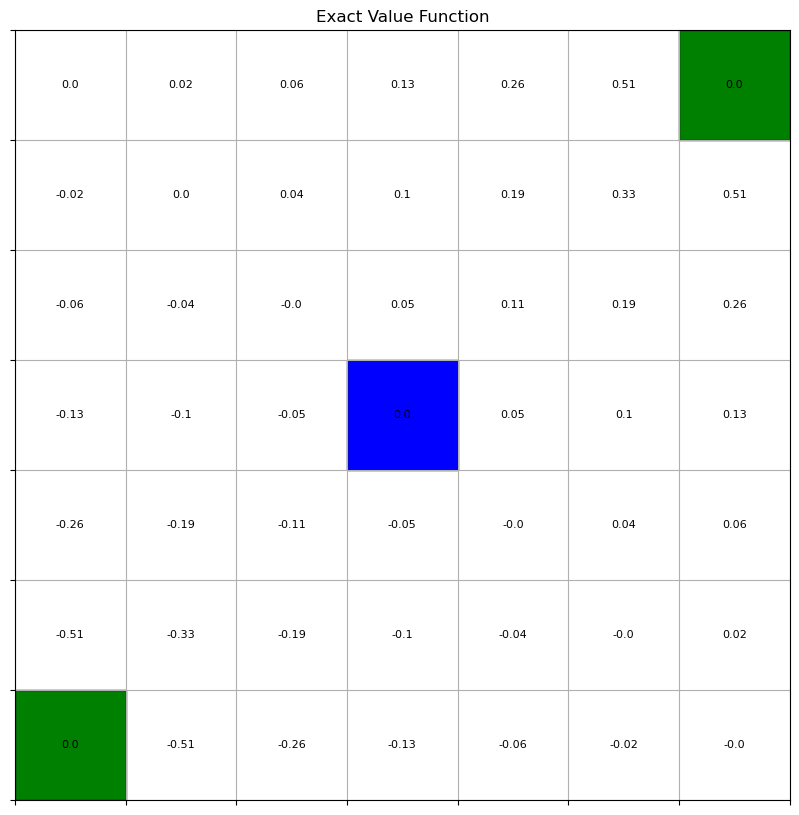

In [28]:
def iterative_policy_evaluation(theta=1e-6):
    V = np.zeros((grid_size, grid_size))
    while True:
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                value = 0
                state = (i, j)
                v = V[i, j]
                if state==(6,0) or state==(0,6):
                    continue
                for action in actions:
                    next_state,reward = get_next_state_and_reward(state, action)
                    value += 0.25 * (reward + gamma * V[next_state]) 
                V[i, j] = value
                delta = max(delta, abs(v - value))
        if delta < theta:
            break
    return V

V = iterative_policy_evaluation()
# print(V)
plot_gridworld(V,"Exact Value Function")


## Gradient Monte Carlo Algorithm

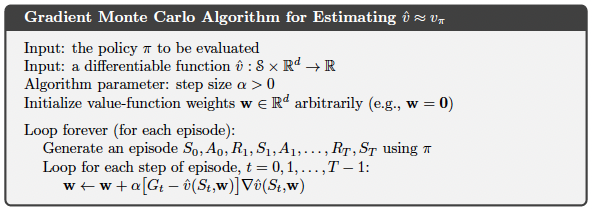

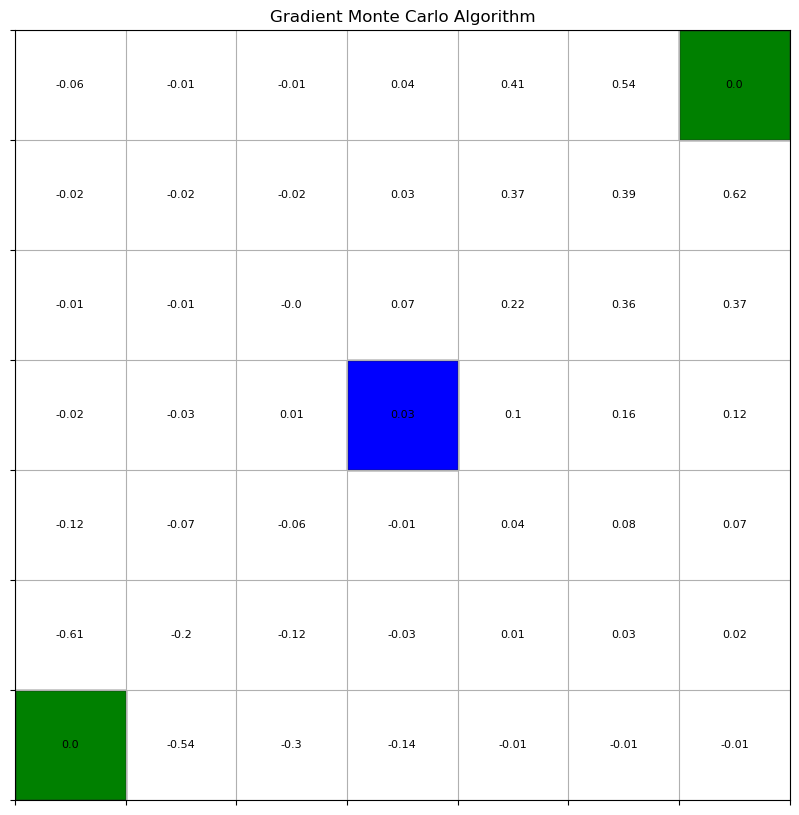

In [34]:
# Algorithm parameters
feature_size = grid_size**2  # feature size
w = np.zeros(feature_size)

# Define the feature vector for each state
def state_to_feature(state):
    feature = np.zeros(feature_size)
    feature[state[0] * 7 + state[1]] = 1
    return feature

# Define the value function approximation
def value_function(state, w):
    feature = state_to_feature(state)
    return np.dot(w, feature)

for i in range(T_episodes):
    episode = generate_episode()
    G=0
    # print(episode)
    for t in reversed(range(len(episode))):
        state, action, reward = episode[t]
        G = gamma * G + reward
        feature = state_to_feature(state)
        value_estimate = np.dot(w, feature)
        gradient = feature  # For a linear function approximator   
        w += alpha * (G - value_estimate) * gradient

V=np.resize(w,(7,7))
plot_gridworld(V,"Gradient Monte Carlo Algorithm")


## Semi-gradient TD(0)

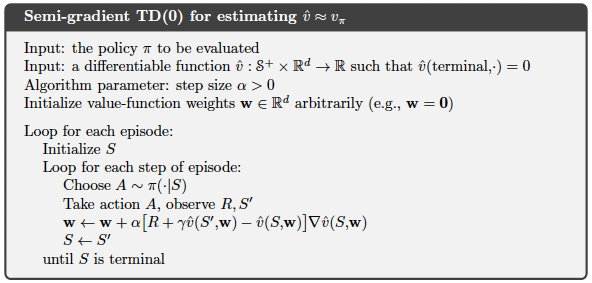

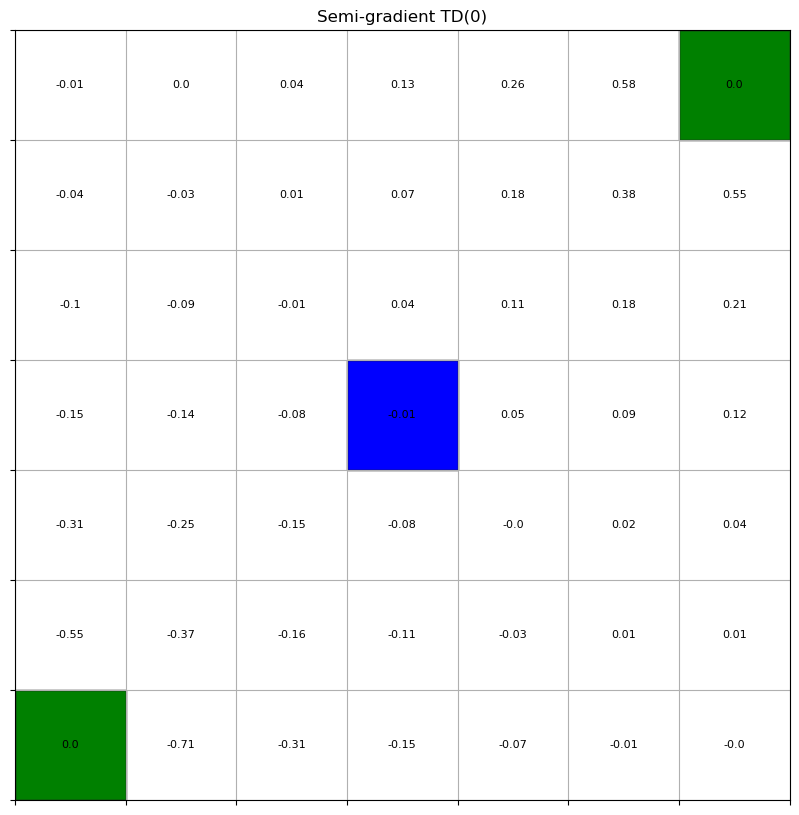

In [31]:
# Algorithm parameters
feature_size = grid_size**2  # feature size
w = np.zeros(feature_size)

# Define the feature vector for each state
def state_to_feature(state):
    feature = np.zeros(feature_size)
    feature[state[0] * 7 + state[1]] = 1
    return feature

# Define the value function approximation
def value_function(state, w):
    feature = state_to_feature(state)
    return np.dot(w, feature)

for i in range(T_episodes):
    state = (3,3) #Fixed starting point
    while True:
        action = random.choice(actions)
        next_state, reward = get_next_state_and_reward(state, action)
        feature = state_to_feature(state)               # Xs
        next_feature = state_to_feature(next_state)     # Xs'
        value_estimate = np.dot(w, feature)             #ˆv(S,w)
        next_value_estimate = np.dot(w, next_feature)   #ˆv(S',w)
        gradient = feature                              #deltaˆv(S,w)
        w += alpha * (reward + gamma * next_value_estimate - value_estimate) * gradient
        state=next_state
        if state==(6,0) or state==(0,6):
            break
        
V=np.resize(w,(7,7))
plot_gridworld(V,"Semi-gradient TD(0)")
